### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than &#36;12500, &#36;12500 - &#36;24999, &#36;25000 - &#36;37499, etc.
    -  Number of times that he&#47;she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than $20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [373]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [374]:
data = pd.read_csv('data/coupons.csv')

In [375]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [376]:
# missing data
missing = data.isnull().sum()/data.shape[0]
missing

destination             0.000000
passanger               0.000000
weather                 0.000000
temperature             0.000000
time                    0.000000
coupon                  0.000000
expiration              0.000000
gender                  0.000000
age                     0.000000
maritalStatus           0.000000
has_children            0.000000
education               0.000000
occupation              0.000000
income                  0.000000
car                     0.991485
Bar                     0.008436
CoffeeHouse             0.017108
CarryAway               0.011905
RestaurantLessThan20    0.010249
Restaurant20To50        0.014901
toCoupon_GEQ5min        0.000000
toCoupon_GEQ15min       0.000000
toCoupon_GEQ25min       0.000000
direction_same          0.000000
direction_opp           0.000000
Y                       0.000000
dtype: float64

In [377]:
# duplicate
duplicate = data.duplicated().sum()
duplicate

74

In [378]:
# unique
for column in data.columns:
    unique_values = data[column].nunique()
    print(f"{column}: {unique_values}")

destination: 3
passanger: 4
weather: 3
temperature: 3
time: 5
coupon: 5
expiration: 2
gender: 2
age: 8
maritalStatus: 5
has_children: 2
education: 6
occupation: 25
income: 9
car: 5
Bar: 5
CoffeeHouse: 5
CarryAway: 5
RestaurantLessThan20: 5
Restaurant20To50: 5
toCoupon_GEQ5min: 1
toCoupon_GEQ15min: 2
toCoupon_GEQ25min: 2
direction_same: 2
direction_opp: 2
Y: 2


In [379]:
# column values
for column in data.columns:
    print(data[column].value_counts(), '\n')

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64 

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64 

weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64 

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64 

time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64 

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64 

expiration
1d    7091
2h    5593
Name: count, dtype: int64 

gender
Female    6511
Male      6173
Name: count, dtype: int64 

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64 

maritalStatus
Married partner      5100
Single         

In [380]:
data.groupby(['income'])['Bar'].value_counts(dropna=False)

income            Bar  
$100000 or More   less1    733
                  never    435
                  1~3      350
                  4~8      196
                  gt8       22
$12500 - $24999   never    835
                  1~3      411
                  less1    386
                  4~8      177
                  gt8       22
$25000 - $37499   never    891
                  less1    572
                  1~3      325
                  4~8      197
                  gt8       22
                  NaN        6
$37500 - $49999   never    791
                  less1    505
                  1~3      283
                  4~8      110
                  gt8       88
                  NaN       28
$50000 - $62499   never    759
                  less1    411
                  1~3      286
                  4~8      132
                  gt8       43
                  NaN       28
$62500 - $74999   never    372
                  1~3      182
                  4~8      154
               

In [381]:
# data types
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

TODO:
- Correct the "passanger" column name to "passenger"
- Handle missing values
- Investigate and maybe remove duplicate rows
- For boolean columns, convert to actual boolean type

3. Decide what to do about your missing data -- drop, replace, other...

In [382]:
# correct the "passanger" column name to "passenger"
data = data.rename(columns={'passanger': 'passenger'})

In [383]:
# handling missing values: filling "car" column with "Unknown" and using income based mode for other categorical data
data['car'].fillna('Unknown', inplace=True)

for col in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    data[col] = data.groupby('income')[col].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown'))

In [384]:
# investigate duplicate rows
print(data[data.duplicated()])

# since we do not have unique identifiers for each person, we cannot judge if there is a problem with data or respondents' answers were exactly the same, so I will keep the duplicate rows in place 

     destination passenger weather  temperature  time                 coupon  \
4192        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4236        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4280        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4324        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4409        Work     Alone   Sunny           80   7AM  Carry out & Take away   
...          ...       ...     ...          ...   ...                    ...   
8511        Home     Alone   Sunny           80   6PM                    Bar   
8512        Home   Partner   Sunny           30  10PM  Carry out & Take away   
8513        Work     Alone   Rainy           55   7AM        Restaurant(<20)   
8515        Work     Alone   Snowy           30   7AM      Restaurant(20-50)   
8516        Work     Alone   Sunny           80   7AM        Restaurant(<20)   

     expiration  gender age    maritalS

In [385]:
# convert boolean columns to actual boolean type
for col in ['has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']:
    data[col] = data[col].astype(bool)

In [386]:
# save the cleaned data
data.to_csv('data/coupons_cleaned.csv', index=False)

4. What proportion of the total observations chose to accept the coupon? 



In [387]:
warnings.filterwarnings('ignore', category=FutureWarning)

In [388]:
total_observations = data.shape[0]
accepted_coupons = data['Y'].sum()
proportion_accepted = accepted_coupons/total_observations
print(proportion_accepted)

0.5684326710816777


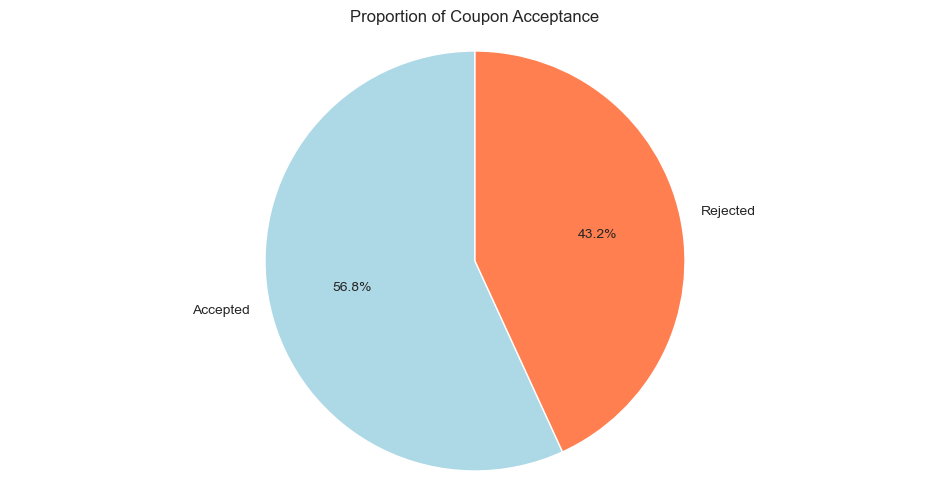

In [389]:
labels = ['Accepted', 'Rejected']
sizes = [proportion_accepted, 1 - proportion_accepted]
colors = ['#add8e6', '#ff7f50']

plt.figure(figsize=(12, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportion of Coupon Acceptance')
plt.show()

5. Use a bar plot to visualize the `coupon` column.

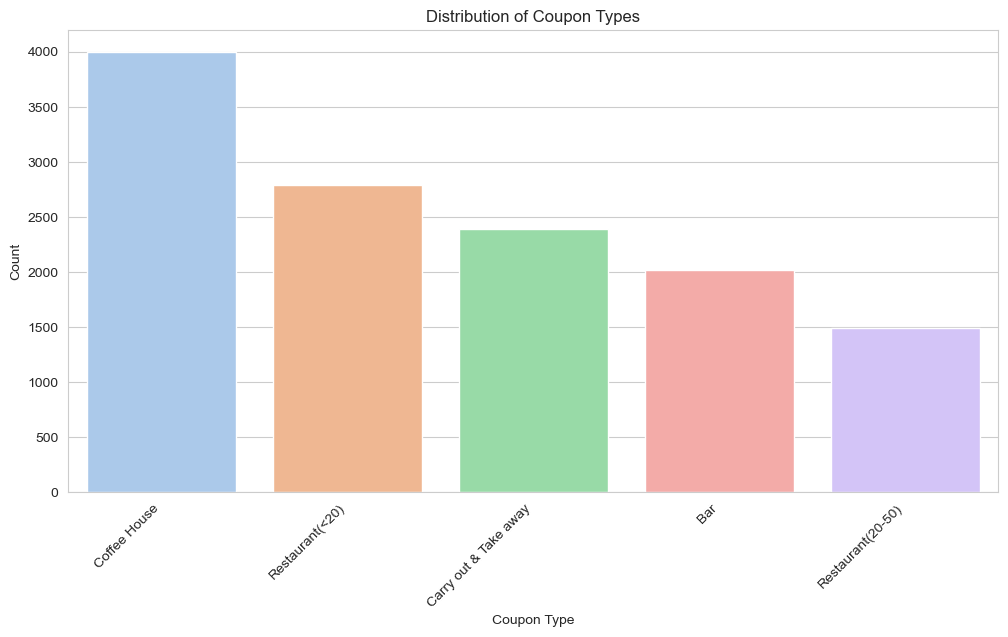

In [390]:
plt.figure(figsize=(12, 6))
sns.countplot(x='coupon', data=data, order=data['coupon'].value_counts().index, palette='pastel')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

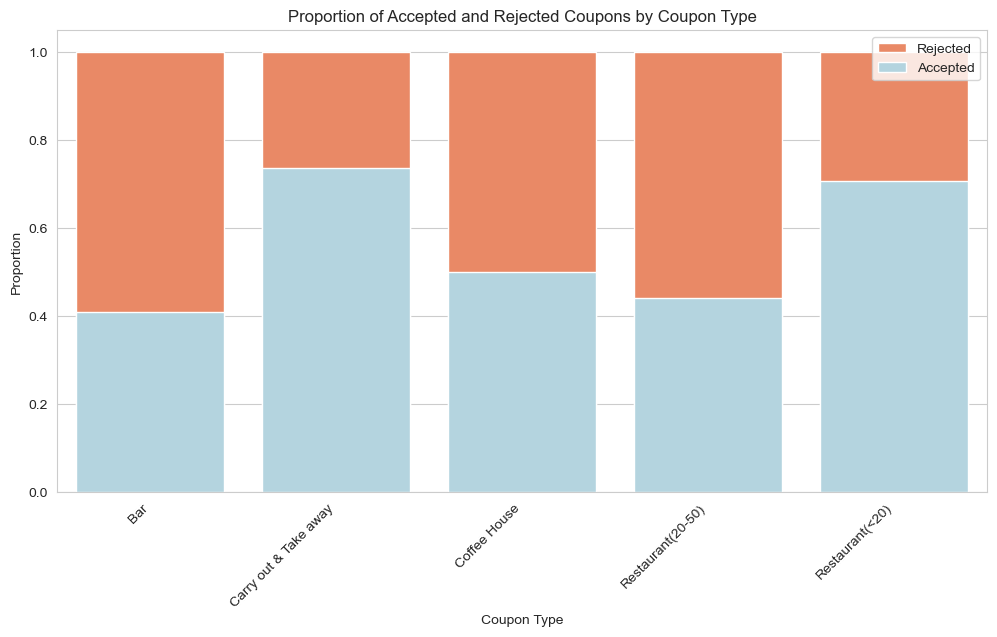

In [391]:
colors = ['#add8e6', '#ff7f50']
coupon_counts = data.groupby('coupon')['Y'].value_counts(normalize=True).unstack()
coupon_counts.columns = ['Rejected', 'Accepted']
coupon_counts['Total'] = coupon_counts['Accepted'] + coupon_counts['Rejected']
coupon_counts['Acceptance Rate'] = coupon_counts['Accepted'] / coupon_counts['Total']
coupon_counts = coupon_counts.sort_values('Total', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=coupon_counts.index, y=coupon_counts['Total'], color=colors[1], label='Rejected')
sns.barplot(x=coupon_counts.index, y=coupon_counts['Accepted'], color=colors[0], label='Accepted')
plt.title('Proportion of Accepted and Rejected Coupons by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Proportion')
plt.legend()
plt.xticks(rotation=45, ha='right')

plt.show()

6. Use a histogram to visualize the temperature column.

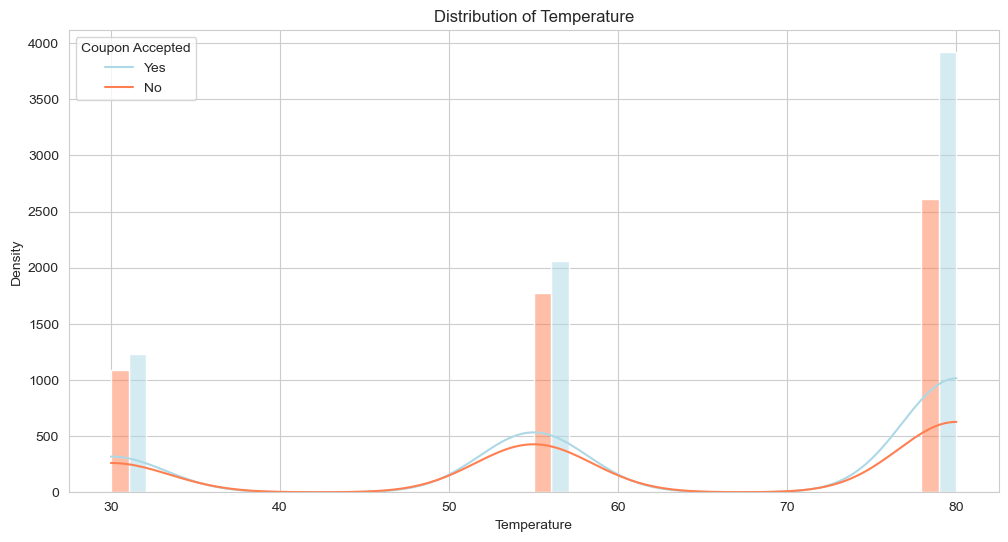

In [392]:
colors = {1:'#add8e6', 0: '#ff7f50'} 
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='temperature', hue ='Y', palette=colors, kde=True, multiple='dodge')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.legend(title='Coupon Accepted', labels=['Yes', 'No'])
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [393]:
data_bar = data[data['coupon'].str.contains('bar', case=False)]
data_bar.describe()

,temperature
count,2017.000000
mean,57.590481
std,17.950408
min,30.000000
25%,55.000000
50%,55.000000
75%,80.000000
max,80.000000


In [394]:
for column in data_bar.columns:
    print(data_bar[column].value_counts(), '\n')

destination
No Urgent Place    1024
Home                506
Work                487
Name: count, dtype: int64 

passenger
Alone        1200
Friend(s)     337
Partner       274
Kid(s)        206
Name: count, dtype: int64 

weather
Sunny    1348
Rainy     430
Snowy     239
Name: count, dtype: int64 

temperature
55    956
80    635
30    426
Name: count, dtype: int64 

time
6PM     566
7AM     487
10AM    444
10PM    402
2PM     118
Name: count, dtype: int64 

coupon
Bar    2017
Name: count, dtype: int64 

expiration
1d    1556
2h     461
Name: count, dtype: int64 

gender
Female    1045
Male       972
Name: count, dtype: int64 

age
21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: count, dtype: int64 

maritalStatus
Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: count, dtype: int64 

has_children
False    1142
True      875
Name

2. What proportion of bar coupons were accepted?


In [395]:
bar_acceptance_rate = data_bar['Y'].mean()
bar_acceptance_rate

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [437]:
data_bar.loc[:, 'frequent_bar'] = data_bar['Bar'].map(lambda x: '>3' if x in ['4~8', 'gt8'] else '<=3') # add a column with bar visit frequency

acceptance_rates = data_bar.groupby('frequent_bar')['Y'].mean()
print(acceptance_rates)

frequent_bar
<=3    0.370737
>3     0.768844
Name: Y, dtype: float64


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [439]:
data_bar.loc[:, 'age_25_bar'] = ((data_bar['Bar'] != 'never') & (data_bar['Bar'] != 'less1') & (data_bar['age'].isin(['26', '31', '36', '41', '46', '50plus']))).astype(int)

acceptance_rates = data_bar.groupby('age_25_bar')['Y'].mean()
print(acceptance_rates)

age_25_bar
0    0.335003
1    0.695238
Name: Y, dtype: float64


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [441]:
data_bar.loc[:, 'urbansocial_bar'] = (
    (data_bar['Bar'] != 'never') & 
    (data_bar['Bar'] != 'less1') & 
    (data_bar['passenger'] != 'Kid(s)') &
    (~data_bar['occupation'].isin(['Farming Fishing & Forestry']))
).astype(int)

acceptance_rates = data_bar.groupby('urbansocial_bar')['Y'].mean()
print(acceptance_rates)


urbansocial_bar
0    0.296044
1    0.713249
Name: Y, dtype: float64


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [443]:
conditions = [
    # group 1
    ((data_bar['Bar'] != 'never') & (data_bar['Bar'] != 'less1') & 
     (data_bar['passenger'] != 'Kid(s)') & (data_bar['maritalStatus'] != 'Widowed')),
    # group 2
    ((data_bar['Bar'] != 'never') & (data_bar['Bar'] != 'less1') & 
     (data_bar['age'].isin(['21', '26']))),
    # group 3
    ((data_bar['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
     (data_bar['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])))
]
choices = ['group1', 'group2', 'group3']
data_bar.loc[:, 'target_group_bar'] = np.select(conditions, choices, default='Others')

acceptance_rates = data_bar.groupby('target_group_bar')['Y'].mean()
print(acceptance_rates)

target_group_bar
Others    0.297166
group1    0.713249
group2    0.777778
group3    0.270270
Name: Y, dtype: float64


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Frequency of bar visits**  
Drivers who visit bars more frequently are more likely to accept bar coupons.  

**Age**  
Younger drivers, particularly those under 30, are more likely to accept bar coupons.

**Passengers**  
Drivers with adult passengers are more likely to accept bar coupons than those with children.

**Marital status**  
Single or unmarried individuals are more likely to accept bar coupons compared to married or widowed individuals.

**Income**  
There might be a relationship between income and bar coupon acceptance, but it's not straightforward.

**Occupation**  
Certain occupations might be associated with higher bar coupon acceptance rates.

**Time of day**  
Bar coupons might be more readily accepted in the evening or at night compared to during the day.

**Proximity to destination**  
Drivers might be more likely to accept bar coupons if they're already headed in the direction of the bar or if it's convenient to their current route.

**Social factors**  
Drivers who are more socially active or have larger social networks might be more likely to accept bar coupons.

**Price sensitivity**  
More price-sensitive individuals might be more likely to accept bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

I'll explore the characteristics of drivers who accept Carry out & Take away coupons. I'll use chi-square p values to understand if there is a significant association between a variable and the fact that a carry out coupon was accepted.

In [400]:
from scipy import stats
data_carry_out = data[data['coupon'] == 'Carry out & Take away']

In [401]:
# function to calculate acceptance rate
def acceptance_rate(group):
    return group['Y'].mean()

In [402]:
# list of columns to analyze
columns_to_analyze = ['destination', 'passenger', 'temperature', 'time', 'expiration', 'age', 'gender', 'maritalStatus', 'has_children',
                      'income', 'education', 'occupation', 'Bar', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
                      'direction_same',  'direction_opp']

In [403]:
# dictionary to store results
results = {}
significant_columns = []

In [404]:
# analyze each column
for column in columns_to_analyze:
    grouped = data_carry_out.groupby(column).apply(acceptance_rate).sort_values(ascending=False)
    results[column] = grouped

# print results
for column, rates in results.items():
    print(f"\nAcceptance rates for {column}:")
    print(rates)
    
    contingency_table = pd.crosstab(data_carry_out[column], data_carry_out['Y'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test p-value: {p_value:.4f}")
    
    if p_value <= 0.05:
        significant_columns.append(column)



Acceptance rates for destination:
destination
Home               0.788668
No Urgent Place    0.762781
Work               0.654856
dtype: float64
Chi-square test p-value: 0.0000

Acceptance rates for passenger:
passenger
Friend(s)    0.757781
Partner      0.731959
Alone        0.727402
Kid(s)       0.703947
dtype: float64
Chi-square test p-value: 0.3700

Acceptance rates for temperature:
temperature
30    0.756325
80    0.729831
55    0.718750
dtype: float64
Chi-square test p-value: 0.2617

Acceptance rates for time:
time
2PM     0.866972
6PM     0.825287
10PM    0.759219
10AM    0.702128
7AM     0.654856
dtype: float64
Chi-square test p-value: 0.0000

Acceptance rates for expiration:
expiration
1d    0.781593
2h    0.663821
dtype: float64
Chi-square test p-value: 0.0000

Acceptance rates for age:
age
50plus     0.774566
36         0.746988
21         0.740741
26         0.731915
below21    0.728070
46         0.728000
41         0.717703
31         0.705584
dtype: float64
Chi-square t

In [405]:
for column in significant_columns:
    print(column)

destination
time
expiration
gender
education
occupation
Bar
direction_same
direction_opp


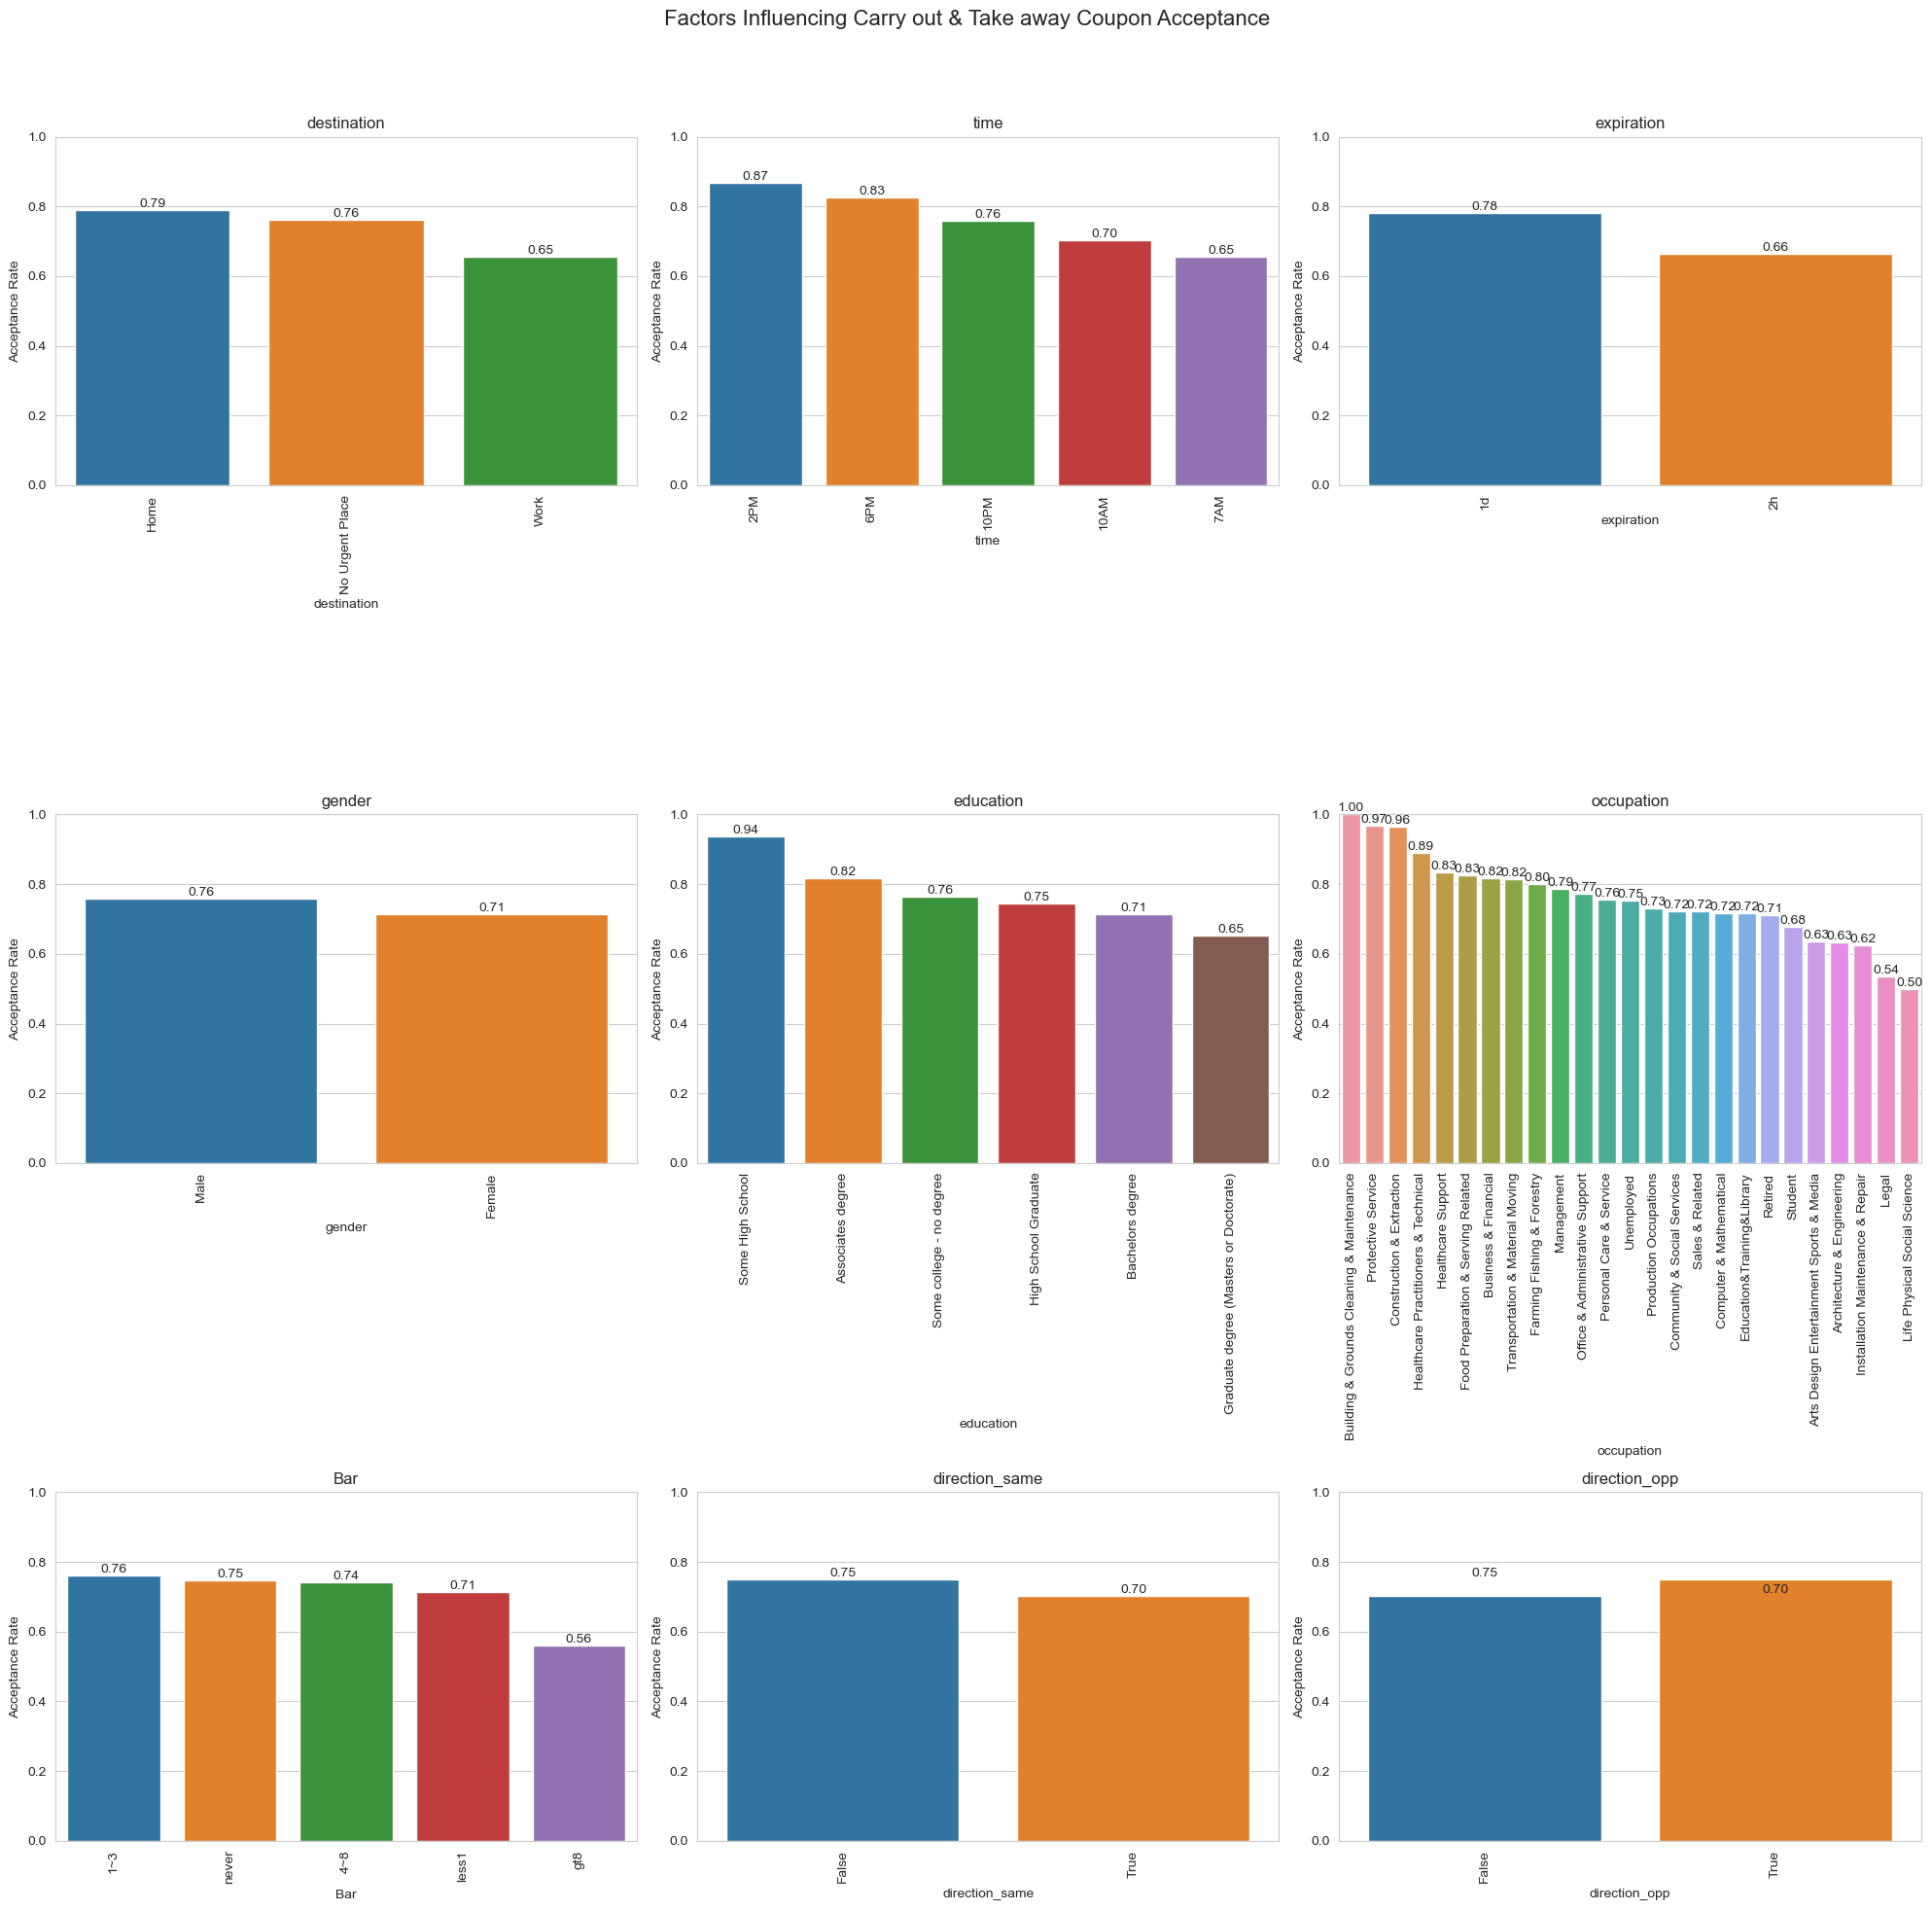

In [406]:
# visualize the significant columns
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('Factors Influencing Carry out & Take away Coupon Acceptance', fontsize=16)

for i, column in enumerate(significant_columns):
    ax = axs[i // 3, i % 3]
    if column:
        rates = results[column]
        sns.barplot(x=rates.index, y=rates.values, ax=ax)
        ax.set_title(column)
        ax.set_ylabel('Acceptance Rate')
        ax.set_ylim(0, 1)
        
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

        for j, v in enumerate(rates):
            ax.text(j, v, f'{v:.2f}', ha='center', va='bottom')
    else:
        ax.axis('off')

fig.subplots_adjust(hspace=0.8)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


Let's check which combinations will give us the most probable coupon acceptance

In [407]:
from itertools import combinations

combinations_list = []
all_combinations = []

for comb in combinations(significant_columns, 2):
    group = data_carry_out.groupby(list(comb))['Y'].mean()
    mean_acceptance_rate = group.max()
    combinations_list.append((comb, mean_acceptance_rate))

combinations_list = sorted(combinations_list, key=lambda x: x[1], reverse=True)

# select the top 3 combinations with unique columns
selected_columns = set()
top_combinations = []

for comb, rate in combinations_list:
    if not any(col in selected_columns for col in comb):
        top_combinations.append((comb, rate))
        selected_columns.update(comb)
    if len(top_combinations) == 3:
        break

for comb, rate in top_combinations:
    print(f"Combination: {comb}, Acceptance Rate: {rate:.4f}")

Combination: ('destination', 'education'), Acceptance Rate: 1.0000
Combination: ('time', 'occupation'), Acceptance Rate: 1.0000
Combination: ('expiration', 'Bar'), Acceptance Rate: 0.8138


Visualizing combinations

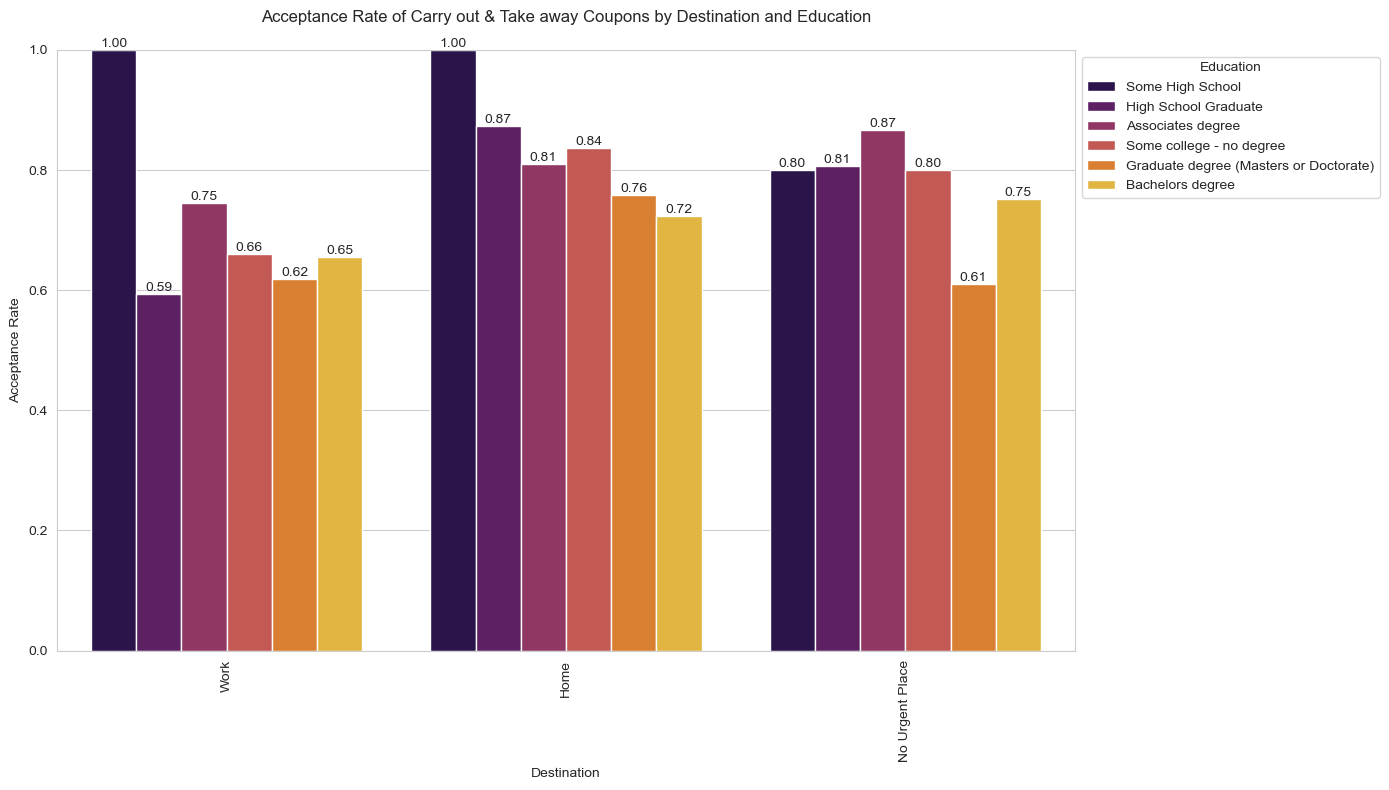

In [408]:
# plotting 'destination' and 'education'
mean_acceptance = data_carry_out.groupby(['destination', 'education'])['Y'].mean().reset_index()
mean_acceptance = mean_acceptance.sort_values(by='Y', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x='destination', y='Y', hue='education', data=mean_acceptance, ci=None, palette='inferno')
plt.title('Acceptance Rate of Carry out & Take away Coupons by Destination and Education', pad=20)
plt.xlabel('Destination')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Education')
plt.tight_layout()
plt.show()

Drivers that are most likely to accept carry out coupons are those that have some high School education and are going either home or to work. Next are high school graduates going home and associate degree holders with no urgent place to go.

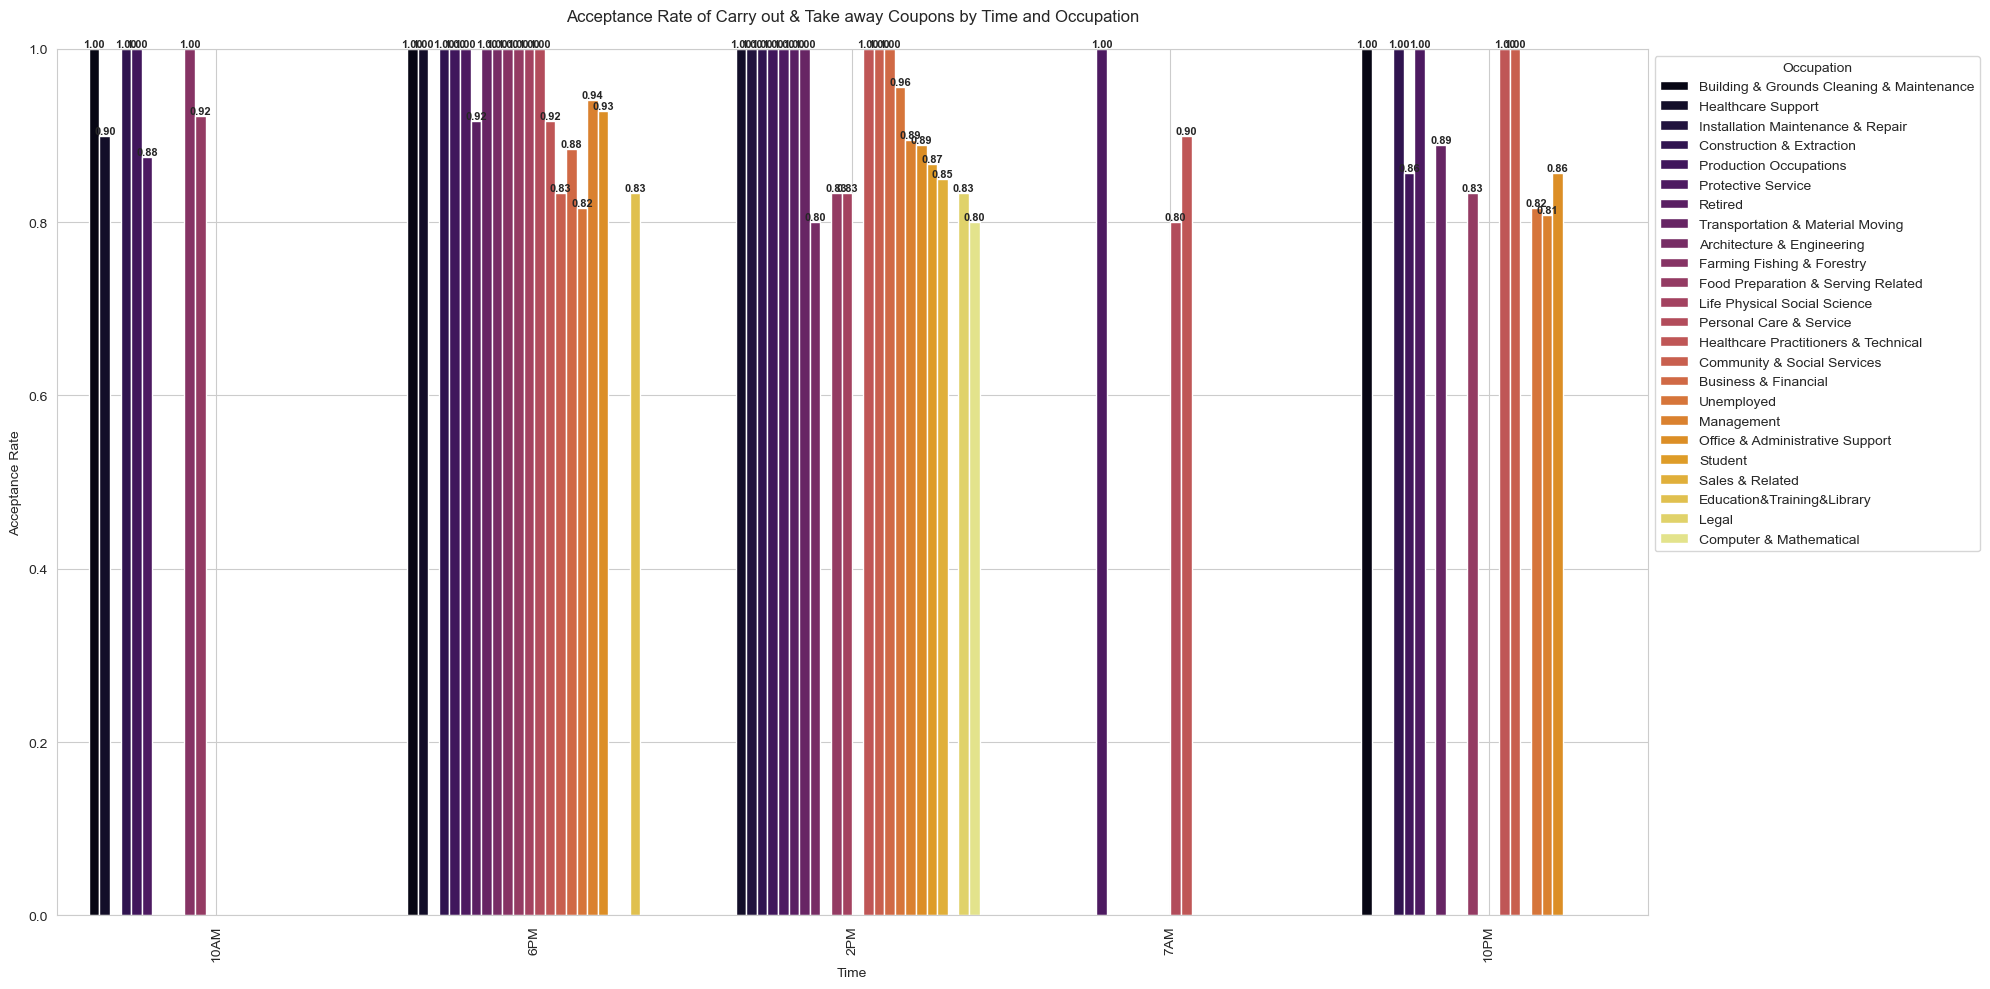

In [432]:
# plotting 'time' and 'occupation'
mean_acceptance = data_carry_out.groupby(['time', 'occupation'])['Y'].mean().reset_index()
mean_acceptance = mean_acceptance[mean_acceptance['Y'] >= 0.8]
mean_acceptance = mean_acceptance.sort_values(by='Y', ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x='time', y='Y', hue='occupation', data=mean_acceptance, ci=None, palette='inferno')
plt.title('Acceptance Rate of Carry out & Take away Coupons by Time and Occupation', pad=20)
plt.xlabel('Time')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)

plt.grid(axis='x')

ax = plt.gca()
for i, p in enumerate(ax.patches):
    height = p.get_height()
    if np.isfinite(height) and height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=8)

plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Occupation')
plt.tight_layout()
plt.show()

Judging by data, I can see the following trends:  
7am: Looks like occupations related to services are starting their day and are most likely to accepting coupons  
10am: Manual labor workers are inclined to accept coupons  
2pm: We have manual labor, service, transportation and retired workers accepting coupons  
6pm: Now there are manual labor, service, transportation and professional workers  
10pm: Service occupations have a perfect acceptance rate, followed by manual labor workers  

Overall, manual labor and service workers show high acceptance rate across multiple times of the day

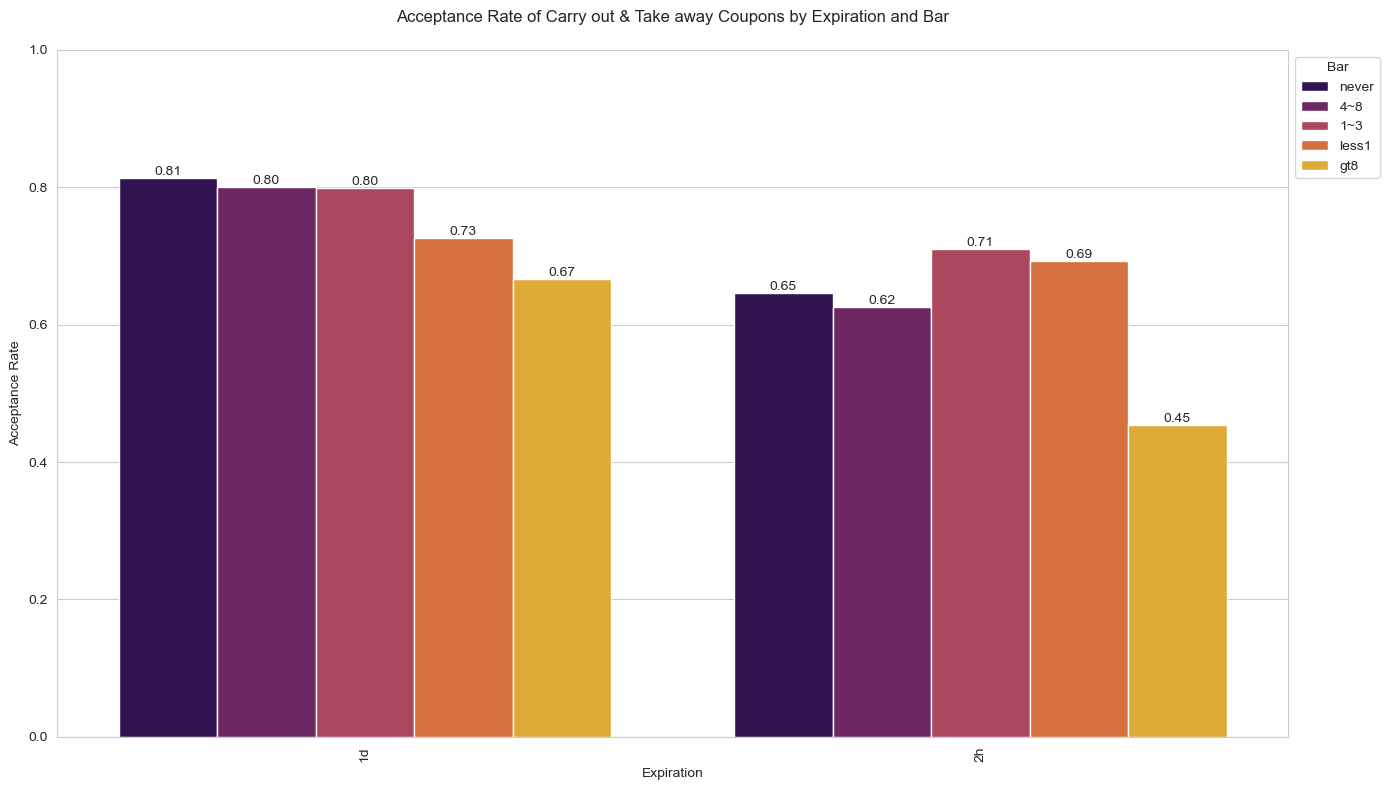

In [435]:
# plotting 'expiration' and 'Bar'
mean_acceptance = data_carry_out.groupby(['expiration', 'Bar'])['Y'].mean().reset_index()
mean_acceptance = mean_acceptance.sort_values(by='Y', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x='expiration', y='Y', hue='Bar', data=mean_acceptance, ci=None, palette='inferno')
plt.title('Acceptance Rate of Carry out & Take away Coupons by Expiration and Bar', pad=20)
plt.xlabel('Expiration')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Bar')
plt.tight_layout()
plt.show()

On the graph we can see that acceptance rate for coupons that expire in one day are generally higher than the two hours ones. Interestingly, one day coupons are equally popular both with frequent bar visitors and those who never (or rarely) go to bars. And two hours coupons are more likely be accepted by people who rarely go to bars. 